In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
import pandas as pd
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
"""
Choose the training data set to be trained on.
"""
dataset = 2

if dataset==1:
    # Training Data set with 10e6 data points for gamma = 0.37, delta = 0.3
    X_train = np.array(pd.read_csv("X_train_mac_lots.csv", header=0, index_col=0))
    y_train = pd.read_csv("y_train_mac_lots.csv", header=0, index_col=0)
    X_test = np.array(pd.read_csv("X_test_mac_lots.csv", header=0, index_col=0))
    y_test = pd.read_csv("y_test_mac_lots.csv", header=0, index_col=0)
elif dataset==2:
    # Training Data set with 10e5 data points for gamma = 0.37, delta = 1
    X_train = np.array(pd.read_csv("X_train_delta1.csv", header=0, index_col=0))
    y_train = pd.read_csv("y_train_delta1.csv", header=0, index_col=0)
    X_test = np.array(pd.read_csv("X_test_delta1.csv", header=0, index_col=0))
    y_test = pd.read_csv("y_test_delta1.csv", header=0, index_col=0)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = pd.DataFrame(scaler.transform(X_train), columns=['x0','v0','t'])
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=['x0','v0','t'])

In [5]:
# set up and train the network
input_shape = (np.shape(X_train)[1], 1)
#opt = RMSprop()
opt = Adam(learning_rate=0.001, beta_1=0.7)

model = Sequential()
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100),tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)]
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(2))
loss='mse'
model.compile(optimizer=opt, loss=loss)
history=model.fit(X_train_scale, y_train, steps_per_epoch=100, epochs=2000, validation_split=0.2, batch_size=2048, shuffle=True, callbacks=callbacks, verbose=1)

Epoch 1/2000
100/100 [==============================] - 2s 18ms/step - loss: 0.1348 - val_loss: 0.0741
Epoch 2/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0721 - val_loss: 0.0710
Epoch 3/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0701 - val_loss: 0.0677
Epoch 4/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0700 - val_loss: 0.0670
Epoch 5/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0672 - val_loss: 0.0663
Epoch 6/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0665 - val_loss: 0.0674
Epoch 7/2000
100/100 [==============================] - 2s 18ms/step - loss: 0.0668 - val_loss: 0.0673
Epoch 8/2000
100/100 [==============================] - 2s 18ms/step - loss: 0.0667 - val_loss: 0.0637
Epoch 9/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0658 - val_loss: 0.0672
Epoch 10/2000
100/100 [==============================] - 2s 17ms/step - l

Epoch 80/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 81/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 82/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 83/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0052 - val_loss: 0.0072
Epoch 84/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 85/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 86/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 87/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 88/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 89/2000
100/100 [==============================] - 2s 17ms

100/100 [==============================] - 2s 17ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 159/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 160/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 161/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 162/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 163/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 164/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 165/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 166/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0034 - val_loss: 0.0048
Epoch 167/2000
100/100 [==============================] - 2s 17ms/step

100/100 [==============================] - 2s 17ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 237/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 238/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 239/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 240/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 241/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0028 - val_loss: 0.0059
Epoch 242/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 243/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 244/2000
100/100 [==============================] - 2s 17ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 245/2000
100/100 [==============================] - 2s 17ms/step

In [106]:
# evaluate the fitting validation and training losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

## Make Prdictions on the Test Dataset
y_pred = pd.DataFrame(model.predict(X_test_scale), columns=['xt','vt'])



In [107]:
pred_norm = np.linalg.norm(y_pred[['xt','vt']].values,axis=1)
true_norm = np.linalg.norm(y_test[['xt','vt']].values,axis=1)
hist_data = np.abs(pred_norm-true_norm)/np.abs(true_norm)
hist_data = pd.DataFrame(hist_data, columns=['norm'])
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.00)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1
    trueList = ~((df > (Q3 + 1.5 * IQR)))
    #trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

indices = Remove_Outlier_Indices(hist_data)
hist_data = hist_data[indices]

You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


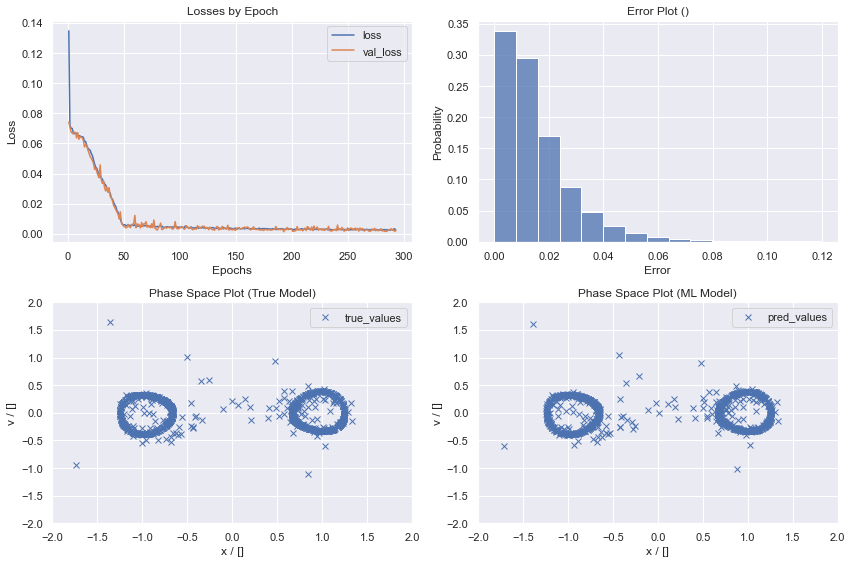

In [118]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))

sns.lineplot(data = history.history, x = epochs, y='loss',ax=axs[0,0], label='loss')
sns.lineplot(data = history.history, x = epochs, y='val_loss',ax=axs[0,0], label='val_loss')

axs[0,0].set_xlabel('Epochs')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title("Losses by Epoch")
axs[0,0].legend()



sns.scatterplot(data = y_test.iloc[:1000,:], x = 'xt', y='vt',ax=axs[1,0],label='true_values', marker='x', linewidth = 1)

axs[1,0].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,0].set_xlabel('x / []')
axs[1,0].set_ylabel('v / []')
axs[1,0].set_title("Phase Space Plot (True Model)")


sns.scatterplot(data = y_pred.iloc[:1000,:], x='xt', y='vt',ax=axs[1,1],label='pred_values',  marker='x', linewidth = 1)

axs[1,1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,1].set_xlabel('x / []')
axs[1,1].set_ylabel('v / []')
axs[1,1].set_title("Phase Space Plot (ML Model)")


sns.histplot(data=hist_data, x = 'norm', kde=False, stat='probability', bins=15, ax=axs[0,1])


axs[0,1].set_xlabel('Error')
axs[0,1].set_ylabel('Probability')
axs[0,1].set_title("Error Plot ()")



f.tight_layout()

f.savefig("ml_model_1_delta1.svg", dpi='figure')

You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


ValueError: Could not interpret value `xt` for parameter `x`

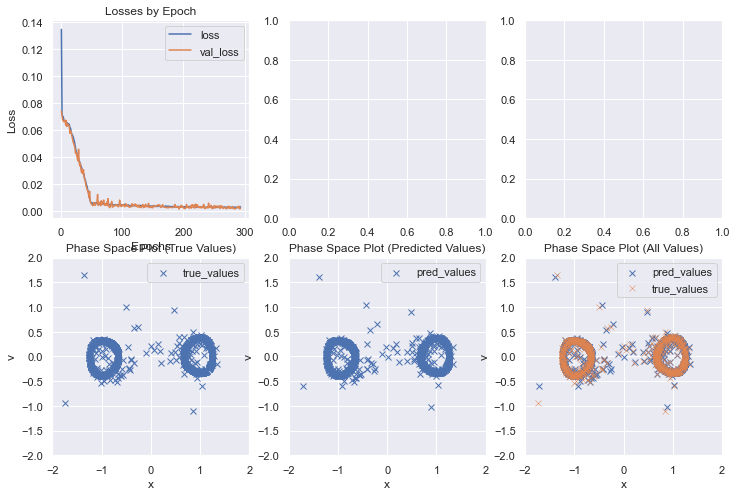

In [91]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

f, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4, 4]))

sns.lineplot(data = history.history, x = epochs, y='loss',ax=axs[0,0], label='loss')
sns.lineplot(data = history.history, x = epochs, y='val_loss',ax=axs[0,0], label='val_loss')

axs[0,0].set_xlabel('Epochs')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title("Losses by Epoch")
axs[0,0].legend()



sns.scatterplot(data = y_test.iloc[:1000,:], x = 'xt', y='vt',ax=axs[1,0],label='true_values', marker='x', linewidth = 1)

axs[1,0].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('v')
axs[1,0].set_title("Phase Space Plot (True Values)")


sns.scatterplot(data = y_pred.iloc[:1000,:], x='xt', y='vt',ax=axs[1,1],label='pred_values',  marker='x', linewidth = 1)

axs[1,1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('v')
axs[1,1].set_title("Phase Space Plot (Predicted Values)")

sns.scatterplot(data = y_pred.iloc[:1000,:], x='xt', y='vt',ax=axs[1,2],label='pred_values', marker='x', linewidth = 1)
sns.scatterplot(data = y_test.iloc[:1000,:], x='xt', y='vt',ax=axs[1,2],label='true_values',  marker='x')
axs[1,2].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,2].set_xlabel('x')
axs[1,2].set_ylabel('v')
axs[1,2].set_title("Phase Space Plot (All Values)")

sns.histplot(data=hist_data.iloc[:10000,:], x = 'xt', kde=False, stat='probability', bins=15, ax=axs[0,1])

#axs[0,1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[0,1].set_xlabel('(y_pred-y_true)/y_true')
axs[0,1].set_ylabel('Probability')
axs[0,1].set_title("Histogram of ||xt_pred-xt_true||/||xt_true||")

sns.histplot(data=hist_data.iloc[:10000,:], x = 'vt', kde=False, stat='probability', bins=15, ax=axs[0,2])

#axs[0,1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[0,2].set_xlabel('(||y_pred-y_true||)/||y_true||')
axs[0,2].set_ylabel('Probability')
axs[0,2].set_title("Histogram of (||vt_pred-vt_true||)/||vt_true||")

f.tight_layout()

f.savefig("fitting_plot_mac_lots.svg", dpi='figure')

In [11]:
class TrueModel():
    def __init__(self, scaler):
        self.alpha=-1
        self.beta=1
        self.delta=1#0.3
        self.gamma=0.37
        self.omega=1.2
        self.scaler = scaler
        
    def inv_transform(self, X):
        return pd.DataFrame(self.scaler.inverse_transform(X), columns=['x0','v0','t'])
       
    def eom(self, u, t):
        x, dx = u[0], u[1]
        ddx= self.gamma * np.cos(self.omega * t) - (self.delta * dx + self.alpha*x + self.beta * x**3)
        return [dx,ddx]
    
    def predict(self, X):
        X = self.inv_transform(X)
        X_res = np.ones((np.shape(X)[0], 2))
        for i in range(0,np.shape(X)[0]):
            t_range = np.linspace(0, X['t'].iloc[i], 500, endpoint=False)
            X_res[i,:] = odeint(self.eom, [X['x0'].iloc[i],X['v0'].iloc[i]], t_range)[-1]
            
        return X_res


In [12]:
for i in range(3):
    print(i)

0
1
2


In [13]:
true_model = TrueModel(scaler)


In [14]:
import shap

background = X_train_scale.iloc[np.random.choice(X_train_scale.shape[0], 100, replace=False)]

true_explainer = shap.explainers.Permutation(true_model.predict, background)
explainer = shap.explainers.Permutation(model.predict, background)

In [15]:
true_values = true_explainer(X_test_scale.iloc[:100,:])
model_values = explainer(X_test_scale.iloc[:100,:])

Permutation explainer: 101it [34:43, 20.83s/it]                         
Permutation explainer: 101it [00:42,  1.85it/s]                         


In [17]:

print("shap_values =", true_values.values)




print("shap_values =", model_values.values)


shap_values = [[[ 1.85935589e-01 -1.26845322e-03]
  [ 7.66621404e-01 -9.45218439e-03]
  [-2.72376773e-01  4.92522992e-02]]

 [[-6.73874542e-01 -1.77585077e-02]
  [-2.32462166e-01 -9.47002079e-03]
  [ 1.76810005e-02  3.75924476e-01]]

 [[ 1.01642017e+00 -2.44279801e-02]
  [-7.37649328e-02  2.20407553e-04]
  [ 2.96255003e-01 -1.06021497e-01]]

 [[-9.26526406e-01  2.16512356e-02]
  [-4.57765481e-03  2.49359812e-03]
  [ 2.64471667e-01 -1.12174815e-01]]

 [[-9.72607792e-01  2.08195126e-02]
  [ 5.39683103e-02  3.05177736e-03]
  [ 1.87190767e-01 -2.31221534e-01]]

 [[ 9.37971307e-01  1.97284125e-03]
  [ 2.09271464e-02  1.39028172e-03]
  [ 2.92109793e-01  1.73659476e-01]]

 [[ 8.92963184e-01 -3.28067171e-02]
  [ 6.64138202e-02 -3.45774721e-03]
  [ 2.94097787e-01 -4.59257575e-02]]

 [[ 9.56477932e-01 -8.22376873e-03]
  [-1.45360586e-02  1.40677569e-03]
  [-2.61728666e-01  4.31082841e-02]]

 [[ 9.85342085e-01 -1.38619780e-02]
  [-6.04316357e-02 -2.62144295e-03]
  [ 1.06968878e-01 -2.73244560e-01

In [19]:
true_explainer_partition = shap.explainers.Partition(true_model.predict, background)
explainer_partition = shap.explainers.Partition(model.predict, background)

In [20]:
true_values_partition = true_explainer_partition(X_test_scale.iloc[:100,:])
model_values_partition = explainer_partition(X_test_scale.iloc[:100,:])

Partition explainer: 101it [04:39,  2.88s/it]                         
Partition explainer: 101it [00:13,  1.80it/s]                         


In [21]:
np.sum(true_values.values[1])

-0.5399597600976289

In [22]:
true_plotting_data = np.empty((len(true_values.values),6))
plotting_data = np.empty((len(true_values.values),6))

for i in range(len(true_values.values)):
    true_plotting_data[i,:] = true_values_partition.values[i].flatten()
    plotting_data[i,:] = model_values_partition.values[i].flatten()
    
true_plot_data = pd.DataFrame(true_plotting_data, columns = ['x0_xt', 'v0_xt', 't_xt', 'x0_vt', 'v0_vt', 't_vt'])
plot_data = pd.DataFrame(plotting_data, columns = ['x0_xt', 'v0_xt', 't_xt', 'x0_vt', 'v0_vt', 't_vt'])

In [23]:
plot_data.index

RangeIndex(start=0, stop=100, step=1)

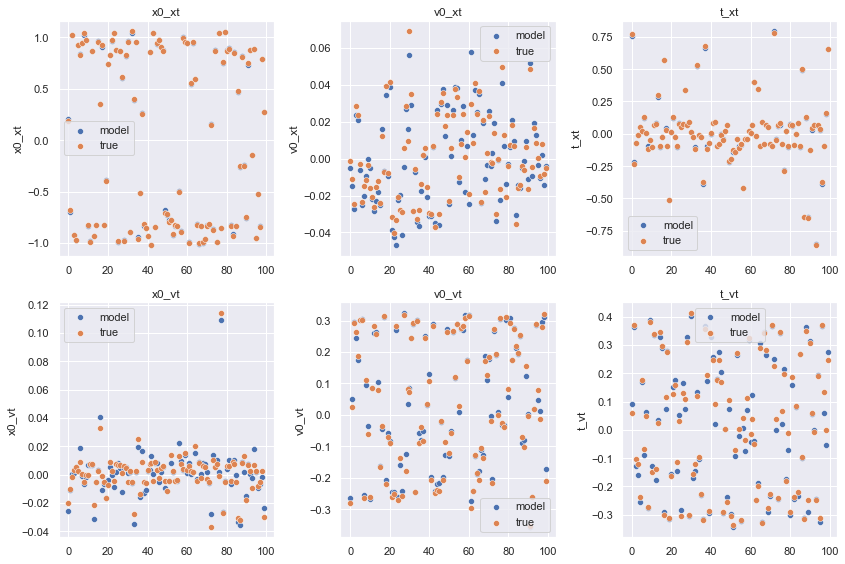

In [24]:
f, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4, 4]))



sns.scatterplot(data = plot_data, x = plot_data.index,  y='x0_xt', label = 'model', ax=axs[0,0])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='x0_xt', label='true',ax=axs[0,0])
axs[0,0].set_title("x0_xt")

sns.scatterplot(data = plot_data, x = plot_data.index,  y='v0_xt', label = 'model', ax=axs[0,1])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='v0_xt', label='true',ax=axs[0,1])
axs[0,1].set_title("v0_xt")

sns.scatterplot(data = plot_data, x = plot_data.index,  y='t_xt', label = 'model', ax=axs[0,2])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='t_xt', label='true',ax=axs[0,2])
axs[0,2].set_title("t_xt")

sns.scatterplot(data = plot_data, x = plot_data.index,  y='x0_vt', label = 'model', ax=axs[1,0])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='x0_vt', label='true',ax=axs[1,0])
axs[1,0].set_title("x0_vt")

sns.scatterplot(data = plot_data, x = plot_data.index,  y='v0_vt', label = 'model', ax=axs[1,1])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='v0_vt', label='true',ax=axs[1,1])
axs[1,1].set_title("v0_vt")

sns.scatterplot(data = plot_data, x = plot_data.index,  y='t_vt', label = 'model', ax=axs[1,2])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='t_vt', label='true',ax=axs[1,2])
axs[1,2].set_title("t_vt")


f.tight_layout()

f.savefig("fitting_plot_mac_lots.svg", dpi='figure')

In [25]:
import lime
import lime.lime_tabular

In [26]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train_scale), verbose=True, mode='regression')

In [27]:


i = 25
lime_exp_model = lime_explainer.explain_instance(X_test_scale.iloc[i], model.predict, num_features=3)
lime_exp_true = lime_explainer.explain_instance(X_test_scale.iloc[i], true_model.predict, num_features=3)


Intercept 0.3540926890433356
Prediction_local [-0.87284841]
Right: -1.105965
Intercept 0.33284070500150487
Prediction_local [-0.82406311]
Right: -1.0816567276733369


In [28]:
true_explainer(X_test_scale.iloc[i:i+1,:]).values

Permutation explainer: 2it [00:23, 23.41s/it]               


array([[[-0.98462881, -0.02719044],
        [ 0.05947885,  0.00499699],
        [-0.13800834, -0.30496913]]])

In [29]:
explainer(X_test_scale.iloc[i:i+1,:])

.values =
array([[[-1.00580131, -0.01312691],
        [ 0.07597109,  0.00774949],
        [-0.16516824, -0.28866301]]])

.base_values =
array([[-0.01096654, -0.0360802 ]])

.data =
array([[-1.22781596,  0.63436949,  1.01525974]])

In [30]:
lime_exp_model.show_in_notebook(show_table=True)

In [31]:
lime_exp_true.show_in_notebook(show_table=True)

In [32]:
X_test_scale.iloc[i]

x0   -1.227816
v0    0.634369
t     1.015260
Name: 25, dtype: float64

In [33]:
y_test.iloc[i]

xt   -1.109979
vt   -0.348022
Name: 25, dtype: float64

In [34]:
model.predict(X_test_scale.iloc[i-1:i,:])

array([[ 0.681746  , -0.00270441]], dtype=float32)

In [35]:
i =14
y_test.iloc[i-1:i,:]

print(model.predict(X_test_scale.iloc[i-1:i,:]))
print(true_model.predict(X_test_scale.iloc[i-1:i,:]))

[[-0.39146072 -0.05539156]]
[[-0.40099942 -0.05052939]]


In [ ]:
y_test.iloc[i-1:i,:]

In [ ]:
X_test[i-1:i,:]

In [ ]:
scaler.inverse_transform(X_test_scale.iloc[i:i+1,:])

In [ ]:
X_test[i-1]

In [ ]:
X_test_scale.iloc[i-1:i,:]

In [ ]:
[X_test_scale['x0'].iloc[i-1],X_test_scale['v0'].iloc[i-1]]

In [ ]:
def eom(self, u, t):
    x, dx = u[0], u[1]
    ddx= self.gamma * np.cos(self.omega * t) - (self.delta * dx + self.alpha*x + self.beta * x**3)
    return [dx,ddx]
    
t_range = np.linspace(0, X['t'].iloc[i-1], 500, endpoint=False)   


In [ ]:
class TrueModel():
    def __init__(self, scaler):
        self.alpha=-1
        self.beta=1
        self.delta=1#0.3
        self.gamma=0.37
        self.omega=1.2
        self.scaler = scaler
        
    def inv_transform(self, X):
        return pd.DataFrame(self.scaler.inverse_transform(X), columns=['x0','v0','t'])
       
    def eom(self, u, t):
        x, dx = u[0], u[1]
        ddx= self.gamma * np.cos(self.omega * t) - (self.delta * dx + self.alpha*x + self.beta * x**3)
        return [dx,ddx]
    
    def predict(self, X):
        X = self.inv_transform(X)
        X_res = np.ones((np.shape(X)[0], 2))
        for i in range(np.shape(X)[0]):
            t_range = np.linspace(0, X['t'].iloc[i-1], 500, endpoint=False)
            X_res[i,:] = odeint(self.eom, [X['x0'].iloc[i],X['v0'].iloc[i]], t_range)[-1]
            
        return X_res